In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import csv

# Import Data from Depression Dataset & Positive Sentiment

In [5]:
dep  = pd.read_csv("akuDepresi_Filtered_Labeled.csv")
nonDep  = pd.read_csv("sentimenIndonesia_Filtered_Labeled.csv")

<strong>remove Username function</strong>

In [6]:
#remove Username function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

<strong>remove twitter handles (@user)</strong>

In [7]:
# remove twitter handles (@user)
dep['tidy_tweet'] = np.vectorize(remove_pattern)(dep['tweet'], "@[\w]*")
nonDep['tidy_tweet'] = np.vectorize(remove_pattern)(nonDep['Tweet'], "@[\w]*")

<strong>remove special characters, numbers, punctuations</strong>

In [8]:
# remove special characters, numbers, punctuations
dep['tidy_tweet'] = dep['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
nonDep['tidy_tweet'] = nonDep['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<strong>remove twitter handles (@user)</strong>

In [9]:
#remove shortwords (word length <=3)
dep['tidy_tweet'] = dep['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
nonDep['tidy_tweet'] = nonDep['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

<strong>remove twitter handles (@user)</strong>

In [10]:
#remove hashtag in front of words 
dep['tidy_tweet'] = dep['tidy_tweet'].str.replace("#([^\s]+)", " ")
nonDep['tidy_tweet'] = nonDep['tidy_tweet'].str.replace("#([^\s]+)", " ")

<strong>remove twitter handles (@user)</strong>

In [11]:
# Tokenization depressive tweet
tokenized_dep = dep['tidy_tweet'].apply(lambda x: x.split())
tokenized_dep.head()

0    [lagunya, billie, marten, sangat, nostalgic, k...
1    [Anjing, push, rank, kalah, teros, nilai, elek...
2                         [kalo, kasus, depresi, bang]
3    [Update, refer, hospital, Unit, psikatri, teta...
4    [kenapa, banyak, orang, depresi, bundir, yang,...
Name: tidy_tweet, dtype: object

<strong>remove twitter handles (@user)</strong>

In [12]:
# Tokenization non-depressive tweet
tokenized_nonDep = nonDep['tidy_tweet'].apply(lambda x: x.split())
tokenized_nonDep.head()

0    [rezeki, putus, inna, larizquna, lahu, fadesun...
1    [makasih, ntar, kita, bagi, hasil, sisanya, bu...
2    [akan, menjadi, satu, satunya, bukan, nomor, s...
3    [dont, know, these, zikir, sangat, membantu, d...
4                         [kamu, lebih, suka, diayomi]
Name: tidy_tweet, dtype: object

In [13]:
from nltk.stem.porter import *
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [14]:
tokenized_dep = tokenized_dep.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_dep.head()

0    [lagu, billie, marten, sangat, nostalgic, kaya...
1    [anjing, push, rank, kalah, ros, nilai, elek, ...
2                         [kalo, kasus, depresi, bang]
3    [update, refer, hospital, unit, psikatri, teta...
4    [kenapa, banyak, orang, depresi, bundir, yang,...
Name: tidy_tweet, dtype: object

In [15]:
tokenized_nonDep = tokenized_nonDep.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_nonDep.head()

0    [rezeki, putus, inna, larizquna, lahu, fadesun...
1    [makasih, ntar, kita, bagi, hasil, sisa, buat,...
2    [akan, jadi, satu, satu, bukan, nomor, satu, t...
3    [dont, know, these, zikir, sangat, bantu, dapa...
4                            [kamu, lebih, suka, ayom]
Name: tidy_tweet, dtype: object

In [31]:
for i in range(len(tokenized_nonDep)):
    tokenized_nonDep[i] = ' '.join(tokenized_nonDep[i])

nonDep['tidy_tweet'] = tokenized_nonDep

In [35]:
for i in range(len(tokenized_nonDep)):
    tokenized_dep[i] = ' '.join(tokenized_dep[i])

dep['tidy_tweet'] = tokenized_dep

In [184]:
def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    return text

In [189]:
# Remove URL
nonDep['tidy_tweet'] = nonDep['tidy_tweet'].str.replace("((www\.[^\s]+)|(https?://[^\s]+))", " ")
dep['tidy_tweet'] = dep['tidy_tweet'].str.replace("((www\.[^\s]+)|(https?://[^\s]+))", " ")

In [190]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('indonesian')

In [196]:
# Remove Stopwords Indonesia
dep['tidy_tweet'] = dep['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in sw]))
nonDep['tidy_tweet'] = nonDep['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in sw]))

# Combine Depressive + Positive Tweets and Split Data into Training&Testing

In [197]:
# Combine Positive and Depressive Tweets
comb = nonDep.iloc[:,1:3].append(dep.iloc[:,1:3], ignore_index=True)

total_tweets = 1000 + 1000

trainIndex, testIndex = list(), list()
for i in range(comb.shape[0]):
    if np.random.uniform(0, 1) < 0.95:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = comb.iloc[trainIndex]
testData = comb.iloc[testIndex]

In [198]:
# train_bow = bow[:31962,:]
# test_bow = bow[31962:,:]
trainDataCSV = trainData.append(testData, ignore_index=True)
trainData.to_csv('trainData_randomize.csv', index=False)
trainDataCSV = pd.read_csv('trainData_randomize.csv')

In [199]:
trainDataCSV

label                                         tidy_tweet
0         0    rezeki putus inna larizquna lahu fadesungguhnya
1         0                            makasih ntar hasil sisa
2         0                                              nomor
3         0  dont know these zikir bantu hasil orang retwee...
4         0                                          suka ayom
5         0                                       bantu nabung
6         0           peduli hidup pilih lihat sisi sisi buruk
7         0     pengantin gelak natural hahahahahahahahahahaha
8         0                             mintak maaf maaf salah
9         0                                   netweetjen bantu
10        0                           allah tuhan lindung bapa
11        0                giveaway umur rules wish screenshoo
12        0                           allah tuhan lindung bapa
13        0                    selamat jumat bikin rindu kumat
14        0          diremes enyot ngedusel dusel nenen mantap
15        0  rakyat akhirnyauga postelca give away album lo...
16        0                                 pilih salah nyaman
17        0                                      jugaaa bareng
18        0  mini giveaway hubung ultah rezeki pulsa like m...
19        0  aryana tolong bukak mata pilih syafiq biar sof...
20        0  cita cita bintang langit lupa anak tangga renc...
21        0  cantik confess crush peluang kena reject nipis...
22        0  cnta albm dbalk brbh prnh brbh untk mnjdi trba...
23        0                      indonesia damai pimpin beliau
24        0                                 walk ajelah senang
25        0                                                NaN
26        0        sentiasa gembira orang kecewa moga sentiasa
27        0  temen temen jatinangor tolong beli jual beliau...
28        0                                       hahaa ngerti
29        0  kelak orangtua laku anak percaya ayah tidur siang
...     ...                                                ...
1871      1  tuhan depresi inget umur ngapa ngapain bentar ...
1872      1  families definition insanity salh depresi asin...
1873      1                                       depresi haha
1874      1  depresi sepele dengar tani sayang percaya tbtb...
1875      1  konser kaya depresi bentar pulang demam sampe ...
1876      1  namjoon selamat bantu insecure depresi bantu l...
1877      1  patah hati depresi babi self control mental st...
1878      1  nder feel same paksa kerja finansial keluarga ...
1879      1  depresi jaman sekolah kambuh lampias emosi nul...
1880      1                      depresi karna uang dompet tip
1881      1  halu gin cewe yank liat cape stress depresi co...
1882      1  ngeh kalo udah tres gabisa ngertiin cueh sampe...
1883      1                      ohhh sakit obat jalan depresi
1884      1  pusing emak ngeluh langsung neken laku huhu de...
1885      1  tetangga cewe depresi berat gara gin gitu tua ...
1886      1  ekspresi lagu contoh ekspresi ikan lagu hellev...
1887      1  sbnrnya stan bangtan smpt ndaperlu disebutin t...
1888      1  ngerasain feeling kaya gin taehyung gitu fansn...
1889      1  tau depresi emang imbalance brain chemical git...
1890      1  hello cari demam sakit gigi depresi bingung na...
1891      1  hello cari demam sakit gigi depresi bingung na...
1892      1                                            depresi
1893      1  papa orang hak resa depresi putus yaaa uji doa...
1894      1  screenshot temen dengerin lagu eminem depresi ...
1895      1  energi plus depresi dicaz michael abis peyug t...
1896      1  help temen udah depresi tingkat nanganin giman...
1897      1  takut malu duhhh kenal kudu gimana ngomong gin...
1898      1  tolong orang depresi butuh diet karna stress l...
1899      1  desember dera ekspresi kaya gin temu depresi i...
1900      1  ngapa anggap orang suka lagu orang bahagia kar...

[1901 rows x 2 columns]

# Bag-of-Words Features

In [200]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)

# bag-of-words feature matrix
bowF = bow_vectorizer.fit_transform(trainDataCSV['tidy_tweet'].values.astype('U'))

# TF-IDF Features

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction import text

# tambahan = open('stopword.txt', 'r')
# lines = tambahan.readlines()
# lines.str.replace("[\n]", "")
# print(lines)
# my_stop_words = text.ENGLISH_STOP_WORDS.union('stopword.txt')

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(trainDataCSV['tidy_tweet'].values.astype('U'))

# Building model using Bag-of-Words features

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [203]:
trainDataCSV.shape[0] #1911 rows
trainDataCSV_bow = bowF[:1911,:]
testDataCSV_bow = bowF[1911:,:]

# xtrain_bow = trainDataCSV_bow[0:,]

In [204]:
trainDataCSV_bow

<1901x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 10922 stored elements in Compressed Sparse Row format>

In [205]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(trainDataCSV_bow, trainDataCSV['label'], random_state=42, test_size=0.3)

In [206]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [207]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

In [208]:
f1_score(yvalid, prediction_int) # calculating f1 score

0.9965277777777778

# Building model using TF-IDF features

In [209]:
train_tfidf = tfidf[:1911,:]
test_tfidf = tfidf[1911:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [210]:
lreg.fit(xtrain_tfidf, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [212]:
f1_score(yvalid, prediction_int)

0.9099526066350712

# Kata kata yang umum ditemukan pada Tweet Depresif

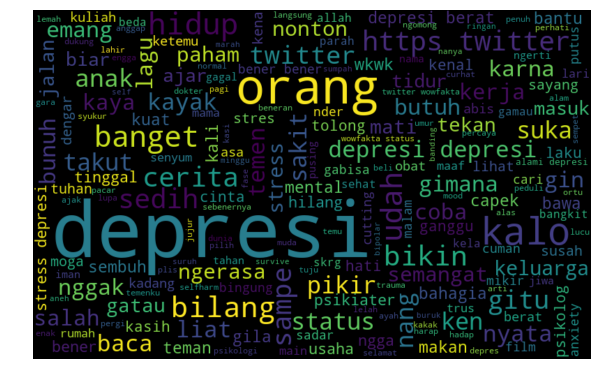

In [214]:
all_words = ' '.join([text for text in dep['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Kata kata yang umum ditemukan pada Tweet Non Depresif (Positif)

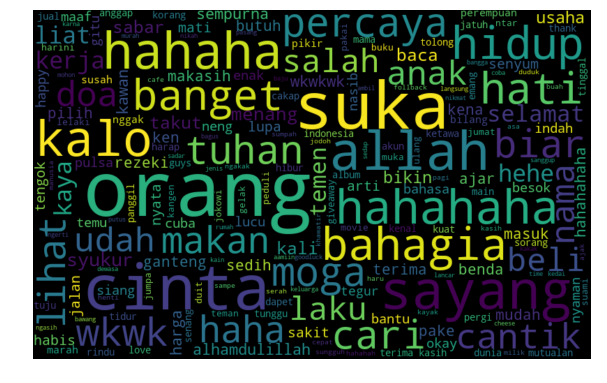

In [215]:
all_words = ' '.join([text for text in nonDep['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()